In [4]:
#!pip install vaderSentiment
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

#test some tweets
tweets = ['$AMC and $GME to the moon! Ryan Cohen can now put my plan into play.', 
      "$TSLA is going to crash hard.", "$NOK doing well!"]

for tweet in tweets:
    vs = analyzer.polarity_scores(tweet)
    print("{:-<70} {}".format(tweet, str(vs)))

$AMC and $GME to the moon! Ryan Cohen can now put my plan into play.-- {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.4003}
$TSLA is going to crash hard.----------------------------------------- {'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.4767}
$NOK doing well!------------------------------------------------------ {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.3382}


In [5]:
%%time
def getVaderDict(x):
    vs = analyzer.polarity_scores(x)
    return vs

#load tweets
df = pd.read_csv("stock_tweets.csv")
df = df.dropna()

vader_scores = df.apply(lambda row: getVaderDict(row.content), axis='columns', result_type='expand')
df = pd.concat([df, vader_scores], axis='columns')
df["datetime"] = pd.to_datetime(df["date"]).dt.date
df.rename(columns={'date': 'datetime', 'datetime': 'date'}, inplace=True)
df.head()

#save to csv
#df.to_csv("stocks_vader_sentiment.csv", index=False)

Wall time: 1min 41s


,url,datetime,content,cashtag,neg,neu,pos,compound,date
0,https://twitter.com/stonksrus/status/134515767...,2021-01-01 23:59:16+00:00,$spy $spx $etsy $ndx $qqq $tsla $aapl $amzn $t...,AAPL,0.000,0.894,0.106,0.4939,2021-01-01
1,https://twitter.com/AdenKane2/status/134515577...,2021-01-01 23:51:42+00:00,Treated myself to an apple watch this year. It...,AAPL,0.046,0.726,0.228,0.7783,2021-01-01
2,https://twitter.com/PortfolioBuzz/status/13451...,2021-01-01 23:51:11+00:00,Imagine reading up on $Oil $AAPL $EURUSD concu...,AAPL,0.000,1.000,0.000,0.0000,2021-01-01
3,https://twitter.com/MacHashNews/status/1345153...,2021-01-01 23:43:32+00:00,"With support officially ended, Adobe 'strongly...",AAPL,0.000,0.642,0.358,0.6908,2021-01-01
4,https://twitter.com/DCDOWORK/status/1345152467...,2021-01-01 23:38:34+00:00,I became debt free in 2020. This year my accou...,AAPL,0.042,0.864,0.095,0.4939,2021-01-01


In [6]:
#mean scores
date_scores = df.groupby(["date", "cashtag"])["compound"].mean().reset_index(name="Sentiment")
date_scores.rename(columns={'date': 'Date', 'cashtag': 'Stock'}, inplace=True)
date_scores.tail()

,Date,Stock,Sentiment
355,2021-04-29,PLTR,0.172282
356,2021-04-29,TSLA,0.144022
357,2021-04-30,AAPL,0.148252
358,2021-04-30,PLTR,0.188688
359,2021-04-30,TSLA,0.157267


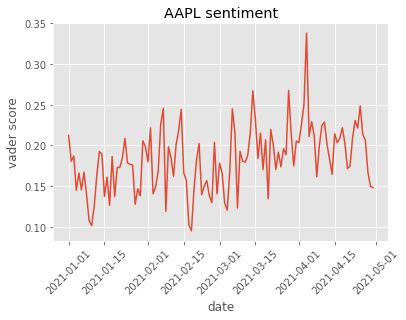

In [7]:
#plot some ticker sentiment
import matplotlib.pyplot as plt

date_scores_aapl = date_scores[date_scores["Stock"]=="AAPL"]

plt.style.use('ggplot')

plt.title("AAPL sentiment")
plt.xlabel("date")
plt.ylabel("vader score")
plt.xticks(rotation=45)
plt.plot(date_scores_aapl.Date, date_scores_aapl.Sentiment)
plt.show()